## Imports

In [5]:
import pandas as pd
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [6]:
amazon_categories_df = pd.read_csv('Amazon Product Database/amazon_categories.csv')
amazon_products_df = pd.read_csv('Amazon Product Database/amazon_products.csv')

## Exploratory

In [7]:
amazon_products_df.head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.00,104,False,2000
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,False,300
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,104,False,400
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,104,False,400


In [8]:
amazon_categories_df.head()

,id,category_name
0,1,Beading & Jewelry Making
1,2,Fabric Decorating
2,3,Knitting & Crochet Supplies
3,4,Printmaking Supplies
4,5,Scrapbooking & Stamping Supplies


In [9]:
amazon_products = pd.merge(amazon_products_df, amazon_categories_df, how='left', left_on='category_id', right_on='id')
amazon_products.head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,id,category_name
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.00,104,False,2000,104,Suitcases
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000,104,Suitcases
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,False,300,104,Suitcases
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,104,False,400,104,Suitcases
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,104,False,400,104,Suitcases


In [10]:
amazon_products[['id', 'category_name']].value_counts()

id   category_name                                 
91   Girls' Clothing                                   28619
84   Boys' Clothing                                    24660
270  Toys & Games                                      20846
114  Men's Shoes                                       19822
118  Women's Handbags                                  18994
                                                       ...  
195  Smart Home: Lawn and Garden                          76
186  Smart Home: Voice Assistants and Hubs                50
185  Smart Home: New Smart Devices                        42
102  Garment Bags                                         40
194  Smart Home Thermostats - Compatibility Checker       22
Name: count, Length: 248, dtype: int64

In [11]:
amazon_products[['id', 'category_name']].value_counts()[:10]

id   category_name    
91   Girls' Clothing      28619
84   Boys' Clothing       24660
270  Toys & Games         20846
114  Men's Shoes          19822
118  Women's Handbags     18994
95   Girls' Jewelry       18514
110  Men's Clothing       18258
112  Men's Accessories    17679
116  Women's Clothing     17393
123  Women's Jewelry      17005
Name: count, dtype: int64

In [12]:
amazon_products.isnull().sum()

asin                 0
title                1
imgUrl               0
productURL           0
stars                0
reviews              0
price                0
listPrice            0
category_id          0
isBestSeller         0
boughtInLastMonth    0
id                   0
category_name        0
dtype: int64

(array([1.31023e+05, 0.00000e+00, 4.53400e+03, 6.37000e+02, 3.62600e+03,
        6.70600e+03, 2.76470e+04, 9.51460e+04, 4.45256e+05, 7.11762e+05]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

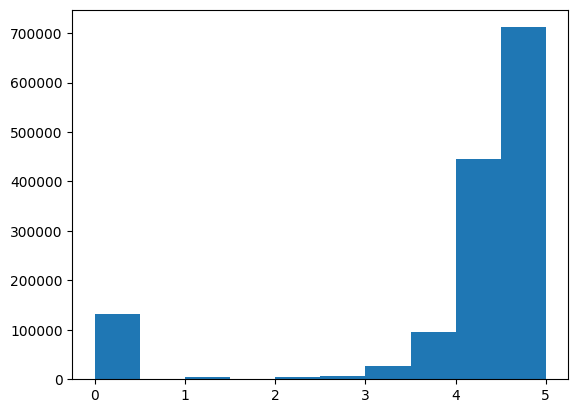

In [13]:
plt.hist(amazon_products['stars'])

In [14]:
amazon_products.loc[amazon_products['stars'] == 0.0]['stars'].count()

np.int64(131023)

In [15]:
np.sqrt(amazon_products['stars'].var())

np.float64(1.3442923176553598)

## Data Prep

In [16]:
amazon_products = amazon_products.dropna(subset=['title'])
amazon_products = amazon_products.loc[amazon_products['stars'] != 0.0]

(array([4.47200e+03, 4.40000e+02, 2.61100e+03, 2.51100e+03, 5.46900e+03,
        2.76470e+04, 6.37320e+04, 1.40566e+05, 5.11149e+05, 5.36716e+05]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

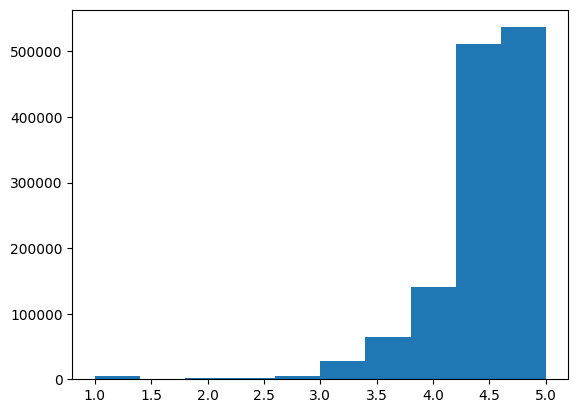

In [17]:
plt.hist(amazon_products['stars'])

## Modelling

### General

In [18]:
X, y = amazon_products['title'], amazon_products['stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

pipeline = Pipeline([
    ('count_vectorizer', ColumnTransformer([
        ('title', TfidfVectorizer(stop_words='english', max_features=1000), 'title')
    ])),
    ('linear_regression', LinearRegression())
])
pipeline.fit(X_train.to_frame(), y_train)

y_pred = pipeline.predict(X_train.to_frame())
print(np.sqrt(mean_squared_error(y_train, y_pred)))

y_pred = pipeline.predict(X_test.to_frame())
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.4390522201440811
0.4397265853858582


### By Category

In [23]:
testing_categories = [91, 84, 270, 114, 110, 116, 112, 123, 118, 95]

for cat in testing_categories:
    print(amazon_categories_df.loc[amazon_categories_df['id'] == cat]['category_name'].iloc[0])
    df = amazon_products.loc[amazon_products['category_id'] == cat]
    X, y = df['title'], df['stars']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

    pipeline = Pipeline([
        ('count_vectorizer', ColumnTransformer([
            ('title', TfidfVectorizer(stop_words='english', max_features=1000), 'title')
        ])),
        ('linear_regression', LinearRegression())
    ])
    pipeline.fit(X_train.to_frame(), y_train)

    y_pred = pipeline.predict(X_train.to_frame())
    print("Training RMSE: " + str(np.sqrt(mean_squared_error(y_train, y_pred))))

    y_pred = pipeline.predict(X_test.to_frame())
    print("Testing RMSE: " + str(np.sqrt(mean_squared_error(y_test, y_pred))))

    print()

Girls' Clothing
Training RMSE: 0.3781006590805916
Testing RMSE: 0.42162409778199766

Boys' Clothing
Training RMSE: 0.37393608108037313
Testing RMSE: 0.40772979042141183

Toys & Games
Training RMSE: 0.3476718202482743
Testing RMSE: 0.3669225618922717

Men's Shoes
Training RMSE: 0.36596330368340374
Testing RMSE: 0.4283908085055245

Men's Clothing
Training RMSE: 0.2821710888966631
Testing RMSE: 0.2869744623226969

Women's Clothing
Training RMSE: 0.272100944272651
Testing RMSE: 0.29939810512635945

Men's Accessories
Training RMSE: 0.3194810818045544
Testing RMSE: 0.3528654485280035

Women's Jewelry
Training RMSE: 0.3021668854277094
Testing RMSE: 0.3353116866793912

Women's Handbags
Training RMSE: 0.4431513578707203
Testing RMSE: 0.46644432250888834

Girls' Jewelry
Training RMSE: 0.4368572234750946
Testing RMSE: 0.43919788393894416

